In [8]:
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,text
0,0,L'AUTEUR.\nL'action se passe dans la propriété...
1,1,"LOPAKHINE.\nDieu merci, le train est enfin arr..."
2,2,DOUNIACHA.\nBientôt deux heures. (Elle éteint ...
3,3,LOPAKHINE.\nCombien a-t-il eu de retard ? Deux...
4,4,DOUNIACHA.\nJe vous croyais parti. (Elle tend ...


In [7]:
df["L"] = df.text.str.len()
df.head()


NameError: name 'sb' is not defined

/Users/ascherrer/miniconda3/envs/EM/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='L', ylabel='Count'>

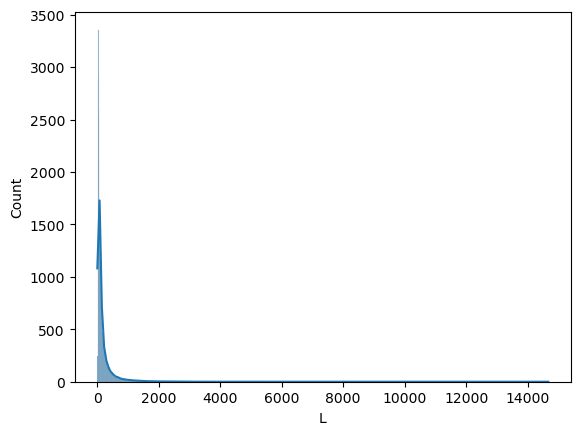

In [11]:
sb.histplot(data=df, x="L", kde=True)

In [6]:
from huggingface_hub import notebook_login
notebook_login()

In [45]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-2-7b-hf", trust_remote_code=True)
tokenizer.pad_token = "AAAA"
tokenizer.padding_side = "left" # Fix weird overflow issue with fp16 training
tokenizer.add_tokens(["<|s|>", "<|e|>"])
#tokenizer.add_tokens(["<|e|>"])

2

In [49]:
from datasets import load_dataset
dataset = load_dataset("ascherrer/mtext-data-150224", split="train")

Generating train split:   0%|          | 0/38666 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6824 [00:00<?, ? examples/s]

In [10]:
dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 38666
})

In [50]:
print(dataset[2]["text"])
tokenizer.tokenize(dataset[2]["text"])

<|s|>
— VALEUR, 3E PARTIE — 
 <|e|>


['▁<|s|>',
 '<0x0A>',
 '—',
 '▁V',
 'A',
 'LE',
 'UR',
 ',',
 '▁',
 '3',
 'E',
 '▁P',
 'ART',
 'IE',
 '▁—',
 '▁',
 '<0x0A>',
 '▁<|e|>']